Creating simbench network and time series dataframes

In [1]:
import simbench as sb
import pandapower as pp
import pandas as pd

In [2]:

grid_code = "1-LV-urban6--0-sw"
net = sb.get_simbench_net(grid_code)

In [3]:
#pp.runpp(net, verbose=True)

In [3]:
profiles = sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

In [4]:
print(profiles.keys())
print(net)

dict_keys([('load', 'p_mw'), ('load', 'q_mvar'), ('sgen', 'p_mw'), ('gen', 'p_mw'), ('storage', 'p_mw')])
This pandapower network includes the following parameter tables:
   - bus (59 elements)
   - load (111 elements)
   - sgen (5 elements)
   - switch (116 elements)
   - ext_grid (1 element)
   - line (57 elements)
   - trafo (1 element)
   - bus_geodata (59 elements)
   - loadcases (6 elements)


In [5]:
sgen_p = profiles[("sgen", "p_mw")]
load_p = profiles[("load", "p_mw")]
load_q = profiles[("load", "q_mvar")]

In [19]:
sgen_p.shape

(35136, 5)

In [16]:
print(load_q)

            0         1         2         3         4         5         6    \
0      0.000000  0.000005 -0.000080  0.000479  0.000000  0.000038 -0.000080   
1      0.000095  0.000005  0.000072  0.000015  0.000069  0.000419  0.000072   
2      0.000095  0.000000  0.000089  0.000023  0.000069  0.000500  0.000089   
3      0.000047 -0.000014  0.000013  0.000053  0.000034  0.000032  0.000013   
4      0.000000  0.000032  0.000030  0.000053  0.000000  0.000059  0.000030   
...         ...       ...       ...       ...       ...       ...       ...   
35131  0.000000  0.000055  0.000013  0.000053  0.000000 -0.000016  0.000013   
35132  0.000095  0.000018  0.000076  0.000061  0.000069 -0.000011  0.000076   
35133  0.000095  0.000000  0.000093  0.000061  0.000069 -0.000032  0.000093   
35134  0.000095 -0.000009  0.000080  0.000000  0.000069  0.000022  0.000080   
35135  0.000000 -0.000005  0.000030 -0.000030  0.000000 -0.000059  0.000030   

            7         8         9    ...       101 

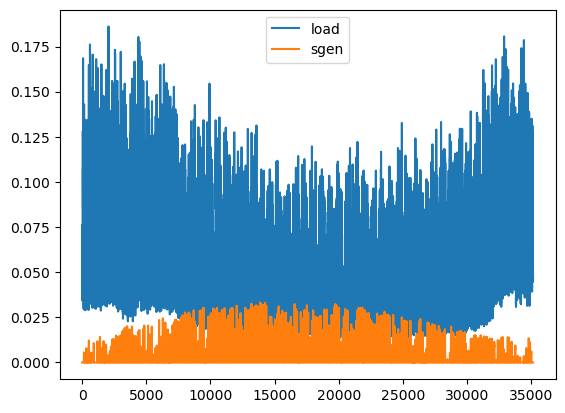

In [8]:
import matplotlib.pyplot as plt
load_p.sum(axis=1).plot(label="load")
sgen_p.sum(axis=1).plot(label="sgen")
plt.legend()
plt.show()

In [9]:
import pandapower.timeseries as ts
from pandapower.control.controller.const_control import ConstControl
from pandapower.timeseries.data_sources.frame_data import DFData

In [10]:
ds = DFData(sgen_p)
ConstControl(net, "sgen", "p_mw", element_index=net.sgen.index, profile_name=sgen_p.columns, data_source=ds)
ds = DFData(load_p)
ConstControl(net, "load", "p_mw", element_index=net.load.index, profile_name=load_p.columns, data_source=ds)
ds = DFData(load_q)
ConstControl(net, "load", "q_mvar", element_index=net.load.index, profile_name=load_q.columns, data_source=ds)

This ConstControl has the following parameters: 

index:             2
json_excludes:     ['self', '__class__']

In [12]:
ts.OutputWriter(net, output_path="./", output_file_type=".xlsx")

OutputWriter: writes output to './' and logs:
'res_bus.vm_pu'
'res_line.loading_percent'

In [13]:
ts.run_timeseries(net)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 35136/35136 [05:34<00:00, 105.12it/s]


Recursive feature elimination with deceision tree classifier

In [32]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [14]:
X = pd.concat([sgen_p, load_p, load_q], axis=1)

In [7]:
y = pd.read_excel('/Users/abs/Desktop/aa-main/res_line/loading_percent.xlsx')

In [19]:
n = len(y.columns)
y.columns = [chr(65 + i) for i in range(n)]

In [20]:
y.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\',
       ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z'],
      dtype='object')

/var/folders/qn/s0cq7qtj2m1c96sbcjgn8qwc0000gn/T/ipykernel_3816/1192734738.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax.plot(y.loc[:,{'A','H','G'}], label='line')


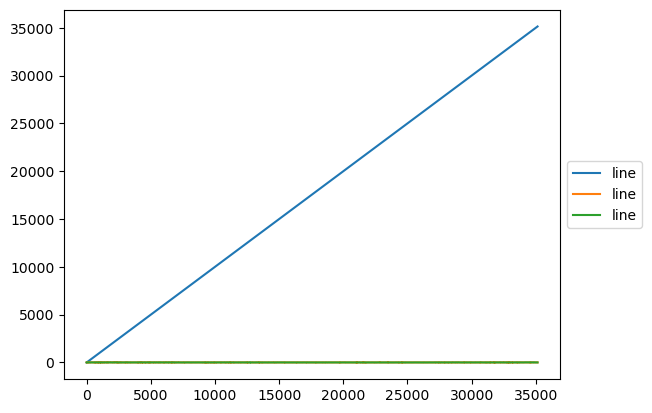

In [25]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
ax.plot(y.loc[:,{'A','H','G'}], label='line')

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#convert continues values to strings

In [34]:

 from sklearn import preprocessing
 from sklearn import utils

In [35]:
 lab = preprocessing.LabelEncoder()
 y_transformed = lab.fit_transform(y)


In [27]:
estimator = DecisionTreeClassifier()
#estimator = svm.SVC()
selector = RFE(estimator, n_features_to_select=5, step=1)

In [36]:
selector1 = selector.fit(X ,y=y_transformed)

In [ ]:
X.columns[rfe.support_]

In [41]:
selector1.support_


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [44]:
print(selector1.ranking_)

[223 222 221 219 217 214 209 206 205 202 200 197 180 176 175 163 157 148
 127 115 122 100  39  93   6  63  42  20  28  57  33  85 109 129  31 135
 208 137  61  49  10  34  64  67 161  55  43  41  48  11  81  53   1  36
 198   1 203 196  12   2 114  13 124  78  18  22 158  59  40 103  24  17
  37 106  38 194  60 199 134 195   4 162  84 160  25  96 153  15 156 110
  91  74 125 118  30  52  89  58 201 130  50 102 138 140 141 113 146 165
 167  75 159 173 154 152 220  98 188 190 191 116 112  45  46 144 151  47
  88  83 108  68  54  29  80 105 136 133   7 183 182  44  16 211  65 147
  99  95 166 121   1  21 210  23 139 215  72 132 216  35  97  86 104  14
  73  19 155  77 207 184 192  82  70 185 169  62 111 149 164  71   1 168
 178 172  51  26 193 150 181  92   1 218   8   5 131   9 120 119   3 170
 142 174 187 143  79 171  56  66 101  90  27  32  69  76 107  87  94 117
 123 126 128 177 179 145 186 189 204 212 213]


In [33]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={selector1.support_[i]} rank={selector1.ranking_[i]}")

0 selected=False rank=223
1 selected=False rank=222
2 selected=False rank=221
3 selected=False rank=220
4 selected=False rank=219
0 selected=False rank=218
1 selected=False rank=217
2 selected=False rank=215
3 selected=False rank=214
4 selected=False rank=213
5 selected=False rank=212
6 selected=False rank=211
7 selected=False rank=210
8 selected=False rank=209
9 selected=False rank=208
10 selected=False rank=207
11 selected=False rank=205
12 selected=False rank=204
13 selected=False rank=203
14 selected=False rank=202
15 selected=False rank=201
16 selected=False rank=200
17 selected=False rank=199
18 selected=False rank=198
19 selected=False rank=195
20 selected=False rank=192
21 selected=False rank=191
22 selected=False rank=188
23 selected=False rank=187
24 selected=False rank=186
25 selected=False rank=185
26 selected=False rank=184
27 selected=False rank=183
28 selected=False rank=182
29 selected=False rank=181
30 selected=False rank=180
31 selected=False rank=179
32 selected=Fals

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)